#  Data Science and Business Analytics Internship Task : 1 

# The Sparks Foundation - GRIPJAN 21

# Task 1 - Prediction using Supervised ML

# Student Percentage Prediction using Supervised Machine Learning

## Problem Statement

- Predict the percentage of an student based on the number of study hours.

## Author : Sarthak A. Kasturiwale

# 1. Importing the Dependencies

In [1]:
# Importing Basic Libraries
import numpy as np
import pandas as pd

# Importing Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

# Importing Sk-learn Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV

# Other Libraries
from prettytable import PrettyTable
import pickle
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# 2. Importing the Data & Basic Data Analysis

In [2]:
# Reading the Data from File

# You can use this also ---> data = pd.read_csv("http://bit.ly/w-data") 
data = pd.read_csv('Student.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Observations:**
- There are only 2 columns in the Data.
- **'Hours'** column is an independent Variable while **'Scores'** column is a depedent variable
- As there is only one variable so no need to standardize or normalize the data.
- The dependent variable has a real values so we have reach to the conclusion is that we can solve the problem by using **Regression**

In [3]:
# Checking the shape of the data for identification of Rows & Columns in the dataset
data.shape

(25, 2)

In [4]:
# Identifying all the column names in the data
list(data.columns)

['Hours', 'Scores']

In [5]:
# Gathering some basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
# Checking for missing or null Values
data.isna().sum()

Hours     0
Scores    0
dtype: int64

**Observations:**
- As there are no missing or null values in the data, so we can move forward in the analysis.

In [7]:
# Dropping the duplicate values
data.drop_duplicates(inplace = True)

In [8]:
# Checking the shape of the data
data.shape

(25, 2)

**Observations:**
- As there are no duplicate values in the data, so we can move forward in the analysis.

In [9]:
# Some basic Statastics
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


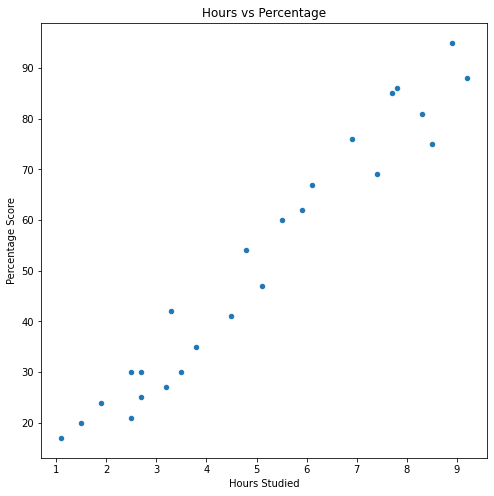

In [10]:
# As here there are only 2 columns in the data, we can visulize it.

# Lets plot the data
data.plot(x = 'Hours', y = 'Scores', kind = 'scatter')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')
plt.show()

**Observations:**
- From the graph above, we can clearly see that there is a **positive linear relation** between the number of hours studied and percentage of score.

In [11]:
# Finding Co-relation between variables
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<AxesSubplot:>

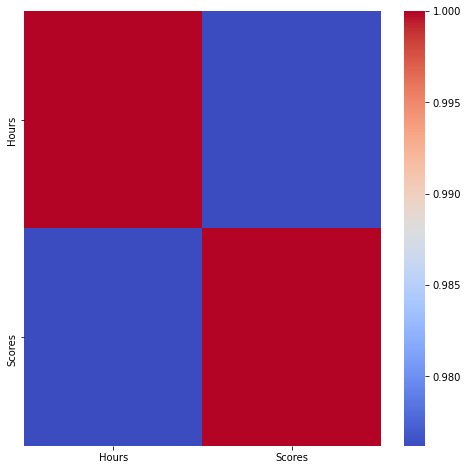

In [12]:
sns.heatmap(data = data.corr(),cmap = 'coolwarm')

**Observations:**
- From the graph above, we can clearly see that there is a **high co-relation** between the number of hours studied and percentage of score.

# 3. Preprocessing

In [13]:
# Divide the data into "attributes" (inputs) and "labels" (outputs).

# Preparing Data
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [14]:
# Splitting the data into Train & Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# 4. Modeling

**Note:**
- Our data set is too small and we have observed that we have linear relationship between 'Hours and Percentage'.
- So we can get good results by using simple Linear Regression
- But we will try all the possible types of Regression and will select the best which gives Lowest Error.
- During the process of Prediction, we will tune the Hyper - Parameters.

## 1. Linear Regression

In [15]:
# Training the Linear Regression model 
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
print('Training Completed')

Training Completed


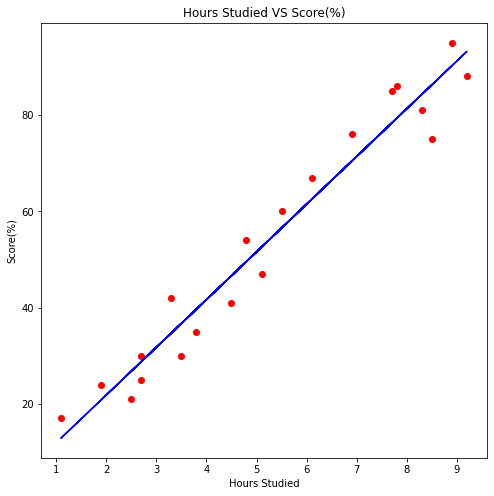

In [16]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,  lin_reg.predict(x_train), color = 'blue')
plt.title('Hours Studied VS Score(%)')
plt.xlabel('Hours Studied')
plt.ylabel('Score(%)')
plt.show()

In [17]:
# Predicting the Test set results
y_pred_lr = lin_reg.predict(x_test)

In [18]:
# Comparing Actual vs Predicted
df_for_lr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_lr})  
df_for_lr

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [19]:
# Evaluating the Model
print('Mean Absolute Error for Linear Regression:', metrics.mean_absolute_error(y_test, y_pred_lr))

Mean Absolute Error for Linear Regression: 4.183859899002975


In [20]:
# Absolute Prediction (As per the Task)

# What will be predicted score if a student studies for 9.25 hrs/ day?
abs_pred_lr = lin_reg.predict([[9.25]])
print('The predicted score of a student will be {}% if he/she studies for 9.25 hrs/day.'.format(np.round(abs_pred_lr[0],2)))

The predicted score of a student will be 93.69% if he/she studies for 9.25 hrs/day.


## 2. Polynomial Regression

In [21]:
# Training the Polynomial Regression model
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x_train)
poly_lin_reg = LinearRegression()
poly_lin_reg.fit(x_poly, y_train)
print('Training Completed')

Training Completed


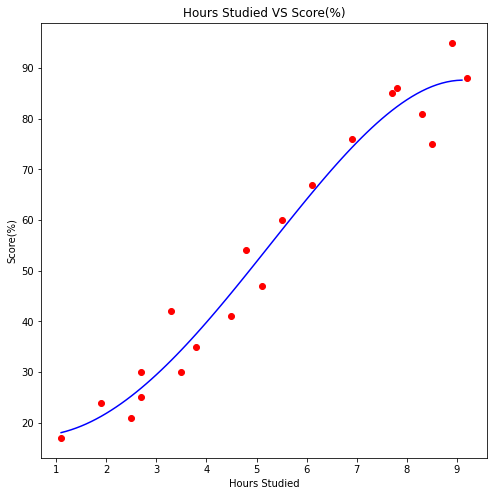

In [22]:
# Visualising the Polynomial Regression results (for higher resolution and smoother curve)
x_grid = np.arange(min(x_train), max(x_train), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_grid, poly_lin_reg.predict(poly_reg.fit_transform(x_grid)), color = 'blue')
plt.title('Hours Studied VS Score(%)')
plt.xlabel('Hours Studied')
plt.ylabel('Score(%)')
plt.show()

In [23]:
# Predicting the Test set results
y_pred_poly_reg = poly_lin_reg.predict(poly_reg.fit_transform(x_test))

In [24]:
# Comparing Actual vs Predicted
df_for_poly_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly_reg})  
df_for_poly_reg

,Actual,Predicted
0,20,19.357598
1,27,31.368837
2,69,79.098876
3,30,25.277196
4,62,62.884625


In [25]:
# Evaluating the Model
print('Mean Absolute Error for Polynomial Regression:', metrics.mean_absolute_error(y_test, y_pred_poly_reg))

Mean Absolute Error for Polynomial Regression: 4.1435088635981945


In [26]:
# Absolute Prediction (As per the Task)

# What will be predicted score if a student studies for 9.25 hrs/ day?
abs_pred_poly_reg = poly_lin_reg.predict(poly_reg.fit_transform([[9.25]]))
print('The predicted score of a student will be {}% if he/she studies for 9.25 hrs/day.'.format(np.round(abs_pred_poly_reg[0],2)))

The predicted score of a student will be 87.56% if he/she studies for 9.25 hrs/day.


## 3. Regularization Model - Ridge Regression

In [27]:
# Ridge Regression
RDG = Ridge()
ridge_param = {'max_iter':[30,20,10,40],'alpha':[0.001, 0.01, 0.1, 1, 5, 10]}
grid_ridge_reg = GridSearchCV(RDG, ridge_param, scoring = 'neg_mean_absolute_error', cv = 4)
grid_ridge_reg.fit(x_train, y_train)
print('Training Completed')

Training Completed


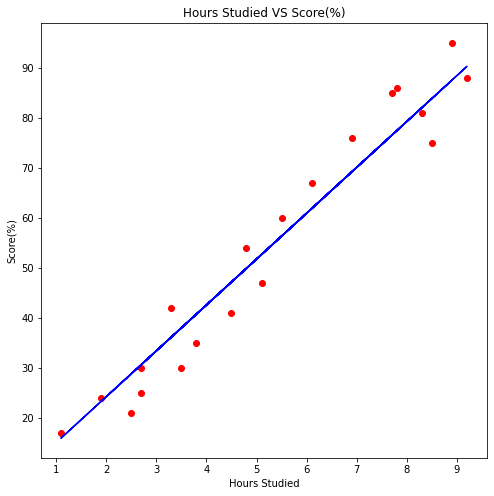

In [28]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,  grid_ridge_reg.predict(x_train), color = 'blue')
plt.title('Hours Studied VS Score(%)')
plt.xlabel('Hours Studied')
plt.ylabel('Score(%)')
plt.show()

In [29]:
print ("Best Parameters : ",grid_ridge_reg.best_params_)

Best Parameters :  {'alpha': 10, 'max_iter': 30}


In [30]:
# Predicting the Test set results
y_pred_rdg_reg = grid_ridge_reg.predict(x_test)

In [31]:
# Comparing Actual vs Predicted
df_for_rdg_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rdg_reg})  
df_for_rdg_reg

,Actual,Predicted
0,20,19.659200
1,27,35.245927
2,69,73.754312
3,30,28.827863
4,62,60.001318


In [32]:
print ("MSE Value For Ridge Regression: ",metrics.mean_absolute_error(y_pred_rdg_reg, y_test))

MSE Value For Ridge Regression:  3.3023718255869667


In [33]:
# Absolute Prediction (As per the Task)

# What will be predicted score if a student studies for 9.25 hrs/ day?
abs_pred_rdg = grid_ridge_reg.predict([[9.25]])
print('The predicted score of a student will be {}% if he/she studies for 9.25 hrs/day.'.format(np.round(abs_pred_lr[0],2)))

The predicted score of a student will be 93.69% if he/she studies for 9.25 hrs/day.


## 4. Support Vector Regression

In [34]:
# Ridge Regression
SVR = SVR()
svr_param = {'C':[0.01,0.1,1,10],'gamma':[0.001, 0.01, 0.1, 1, 10], 'kernel' :['linear', 'poly', 'rbf']}
grid_svr = GridSearchCV(SVR, svr_param, scoring = 'neg_mean_absolute_error', cv = 4)
grid_svr.fit(x_train, y_train)
print('Training Completed')

Training Completed


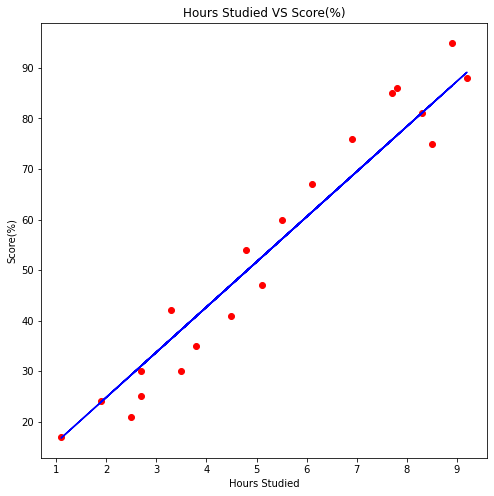

In [35]:
# Visualising the Training set results
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train,  grid_svr.predict(x_train), color = 'blue')
plt.title('Hours Studied VS Score(%)')
plt.xlabel('Hours Studied')
plt.ylabel('Score(%)')
plt.show()

In [36]:
print ("Best Parameters : ",grid_svr.best_params_)

Best Parameters :  {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}


In [37]:
# Predicting the Test set results
y_pred_svr = grid_svr.predict(x_test)

In [38]:
# Comparing Actual vs Predicted
df_for_svr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svr})  
df_for_svr

,Actual,Predicted
0,20,20.32500
1,27,35.51875
2,69,73.05625
3,30,29.26250
4,62,59.65000


In [39]:
print ("MSE Value For Support Vector Regression: ",metrics.mean_absolute_error(y_pred_svr, y_test))

MSE Value For Support Vector Regression:  3.197500040038552


In [40]:
# Absolute Prediction (As per the Task)

# What will be predicted score if a student studies for 9.25 hrs/ day?
abs_pred_svr = grid_svr.predict([[9.25]])
print('The predicted score of a student will be {}% if he/she studies for 9.25 hrs/day.'.format(np.round(abs_pred_svr[0],2)))

The predicted score of a student will be 89.59% if he/she studies for 9.25 hrs/day.


## 5. Decision Tree Regression

In [41]:
# Training the Polynomial Regression model
dt_reg = DecisionTreeRegressor()

# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 6, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3]

# Create the random grid
dt_param = {'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

grid_dt_reg = GridSearchCV(dt_reg, dt_param, scoring = 'neg_mean_absolute_error', cv = 2)
grid_dt_reg.fit(x_train, y_train)
print('Training Completed')

Training Completed


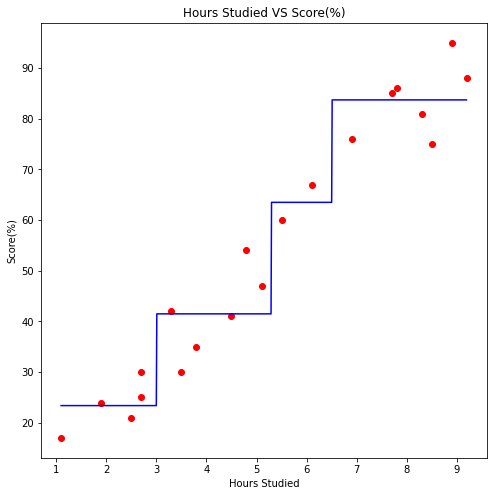

In [42]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_grid, grid_dt_reg.predict(x_grid), color = 'blue')
plt.title('Hours Studied VS Score(%)')
plt.xlabel('Hours Studied')
plt.ylabel('Score(%)')
plt.show()

In [43]:
print ("Best Parameters : ",grid_dt_reg.best_params_)

Best Parameters :  {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [44]:
# Predicting the Test set results
y_pred_dt_reg = grid_dt_reg.predict(x_test)

In [45]:
# Comparing Actual vs Predicted
df_for_dt_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt_reg})  
df_for_dt_reg

,Actual,Predicted
0,20,23.400000
1,27,41.500000
2,69,83.714286
3,30,23.400000
4,62,63.500000


In [46]:
# Evaluating the Model
print('Mean Absolute Error for Decision Tree Regression:', metrics.mean_absolute_error(y_test, y_pred_dt_reg))

Mean Absolute Error for Decision Tree Regression: 8.142857142857142


In [47]:
# Absolute Prediction (As per the Task)

# What will be predicted score if a student studies for 9.25 hrs/ day?
abs_pred_dt_reg = grid_dt_reg.predict([[9.25]])
print('The predicted score of a student will be {}% if he/she studies for 9.25 hrs/day.'.format(np.round(abs_pred_dt_reg[0],2)))

The predicted score of a student will be 83.71% if he/she studies for 9.25 hrs/day.


## 6. Random Foreset Regression

In [48]:
# Training the Polynomial Regression model
rf_reg = RandomForestRegressor()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 3, stop = 10, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 6, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 3]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Create the random grid
rf_param = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

grid_rf_reg = GridSearchCV(rf_reg, rf_param, scoring = 'neg_mean_absolute_error', cv = 4)
grid_rf_reg.fit(x_train, y_train)
print('Training Completed')

Training Completed


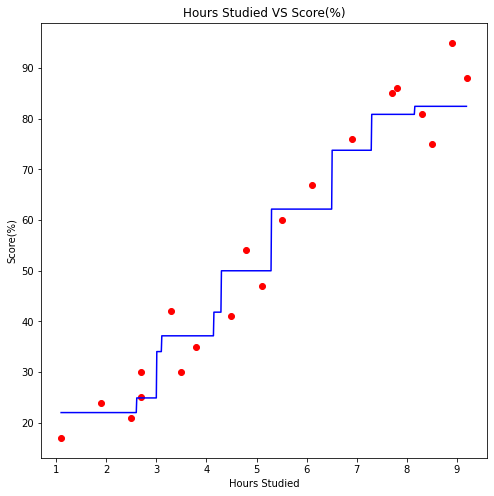

In [49]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_grid, grid_rf_reg.predict(x_grid), color = 'blue')
plt.title('Hours Studied VS Score(%)')
plt.xlabel('Hours Studied')
plt.ylabel('Score(%)')
plt.show()

In [50]:
print("Best Parameters : ",grid_rf_reg.best_params_)

Best Parameters :  {'bootstrap': True, 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 3}


In [51]:
# Predicting the Test set results
y_pred_rf_reg = grid_rf_reg.predict(x_test)

In [52]:
# Comparing Actual vs Predicted
df_for_rf_reg = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf_reg})  
df_for_rf_reg

,Actual,Predicted
0,20,22.022222
1,27,37.166667
2,69,80.861111
3,30,22.022222
4,62,62.166667


In [53]:
# Evaluating the Model
print('Mean Absolute Error for Random Forest Regression:', metrics.mean_absolute_error(y_test, y_pred_rf_reg))

Mean Absolute Error for Random Forest Regression: 6.4388888888888856


In [54]:
# Absolute Prediction (As per the Task)

# What will be predicted score if a student studies for 9.25 hrs/ day?
abs_pred_rf_reg = grid_rf_reg.predict([[9.25]])
print('The predicted score of a student will be {}% if he/she studies for 9.25 hrs/day.'.format(np.round(abs_pred_rf_reg[0],2)))

The predicted score of a student will be 82.44% if he/she studies for 9.25 hrs/day.


# 5. Gathering All The Results Together

In [55]:
x = PrettyTable()

x.field_names = ["Sr. No.", "Type of Model", "Mean Absoulute Error", "Sample Input", "Predicted Percentage"]

x.add_row([1, "Linear Regression", 4.183859899002975, 9.25, 93.69])
x.add_row([2, "Polynomial Regression", 4.1435088635981945, 9.25, 87.56])
x.add_row([3, "Regularization Model - Ridge Regression", 3.3023718255869667, 9.25, 93.69])
x.add_row([4, "Support Vector Regression", 3.197500040038552, 9.25, 89.59])
x.add_row([5, "Decision Tree Regression", 8.142857142857142, 9.25, 83.71])
x.add_row([6, "Random Foreset Regression", 7.481111111111112, 9.25, 85.19])

print(x)

+---------+-----------------------------------------+----------------------+--------------+----------------------+
| Sr. No. |              Type of Model              | Mean Absoulute Error | Sample Input | Predicted Percentage |
+---------+-----------------------------------------+----------------------+--------------+----------------------+
|    1    |            Linear Regression            |  4.183859899002975   |     9.25     |        93.69         |
|    2    |          Polynomial Regression          |  4.1435088635981945  |     9.25     |        87.56         |
|    3    | Regularization Model - Ridge Regression |  3.3023718255869667  |     9.25     |        93.69         |
|    4    |        Support Vector Regression        |  3.197500040038552   |     9.25     |        89.59         |
|    5    |         Decision Tree Regression        |  8.142857142857142   |     9.25     |        83.71         |
|    6    |        Random Foreset Regression        |  7.481111111111112   |    

# 6. Conclusions

- From the above table we can conclude that the Mean Absolute Error given by Support Vector Regression is Lowest amongst all, so we will choose the **'Support Vector Regression'** model as a finalized model.

# 7. Saving The Trained Model For Future Usage

In [56]:
# Save the model to disk
filename = 'Finalized_Model'
pickle.dump(grid_svr, open(filename, 'wb'))

In [57]:
# Making Prediction using Saved Model
 
# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict([[9.25]])
print('The predicted score of a student will be {}% if he/she studies for 9.25 hrs/day.'.format(np.round(result[0],2)))

The predicted score of a student will be 89.59% if he/she studies for 9.25 hrs/day.


# 8. Final Comments

- Generally, students who studies for more hours tend to score more. With the given dataset we find the exact same thing.
- There are certain cases where students did not score good even after studing for long hours. 
- But these type of students are rare and they are getting this type of result because of some other reasons. To comment on them, we need some concrete data to make further analysis.
- For the analysis of the data set we have we can say that the **'hours of studies'** is **important** for getting better **'Scores'.** 

# End of Notebook